In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sn
from joypy import joyplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# setting up the path to read the datafiles
root = './data/*final.csv'
files = glob.glob(root)
print(files)

for file in files:
    df = pd.read_csv(file)
df

['./data/winequality-final.csv']


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
1,red,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.000000,3
2,red,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.400000,3
3,red,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.700000,3
4,red,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.800000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6
6493,white,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6
6494,white,6.0,0.410,0.23,1.1,0.066,22.0,148.0,0.99266,3.30,0.47,9.633333,5
6495,white,5.2,0.220,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,5


In [3]:
# describe all wines
df.describe()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
#describe red wines
df[df['type']=='red'].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#describe white wines
df[df['type']=='white'].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

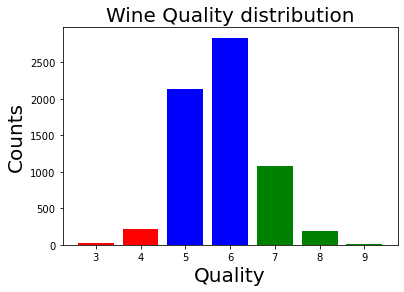

In [6]:
# we want to see the distribution of our wine quality
df_quality = df['quality'].value_counts()

plt.bar(x=df_quality.index,height=df_quality, color =['blue','blue','green','red','green','red','green'])
plt.xlabel('Quality', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Wine Quality distribution', fontsize=20)
df_quality

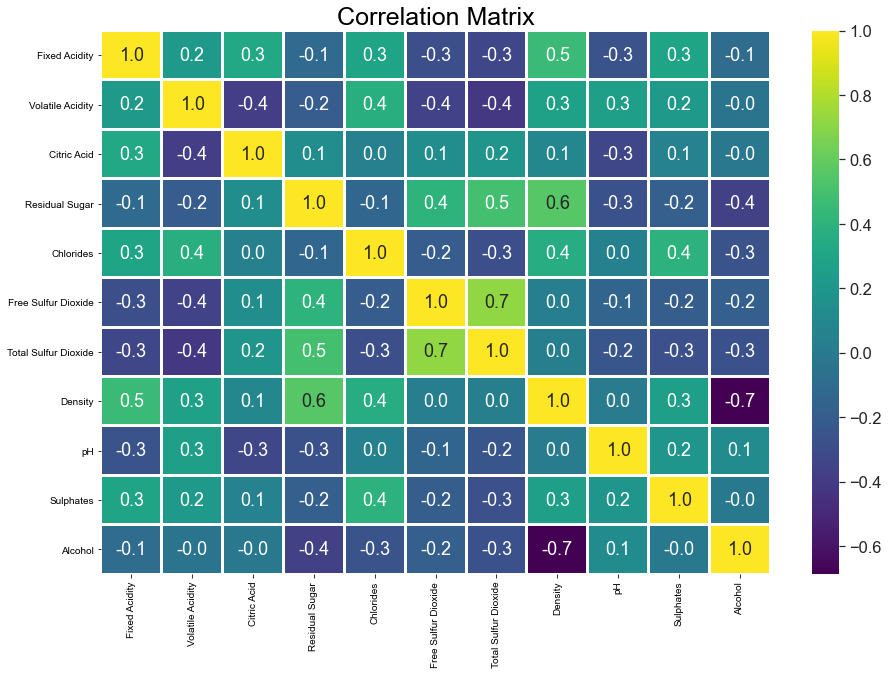

In [7]:
# checking the correlation between variables in our dataframe
df_corr = df.drop(columns='quality')
correlation = df_corr.corr()
plt.subplots(figsize=(15,10))
sn.set(font_scale=1.5)
labels = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides','Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH','Sulphates', 'Alcohol']
ax = sn.heatmap(correlation, annot=True, fmt=".1f",cmap='viridis',linewidths=2.,xticklabels=labels,yticklabels=labels)
ax.set_title('Correlation Matrix', fontsize=25)
plt.savefig('images/correlation_matrix.png', dpi=300)

In [8]:
col_list = set(df.columns)
col_list

{'alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'fixed_acidity',
 'free_sulfur_dioxide',
 'pH',
 'quality',
 'residual_sugar',
 'sulphates',
 'total_sulfur_dioxide',
 'type',
 'volatile_acidity'}

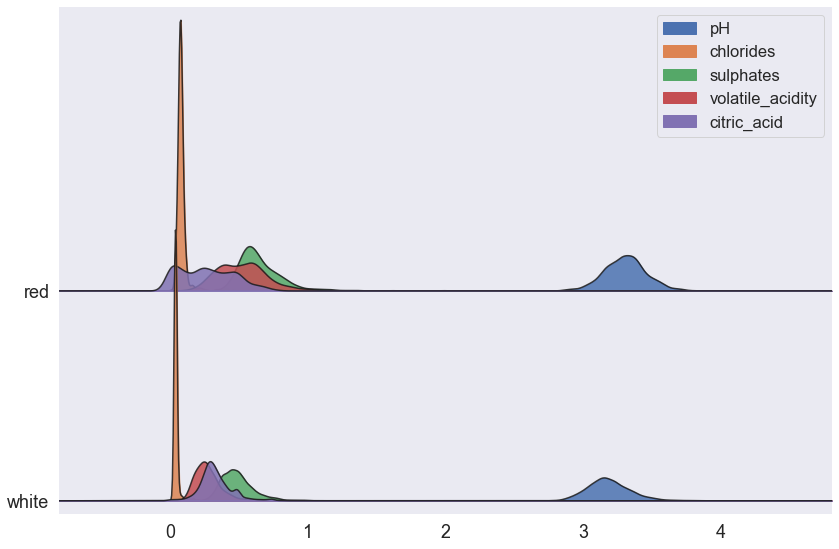

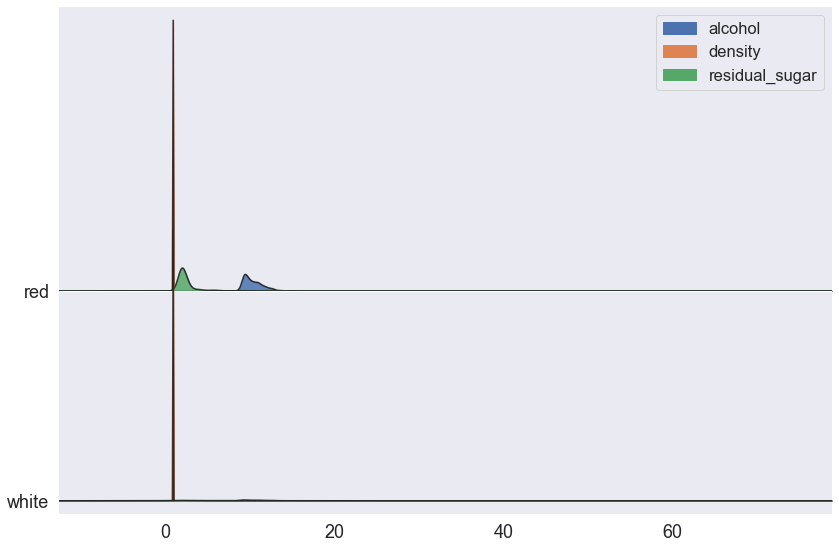

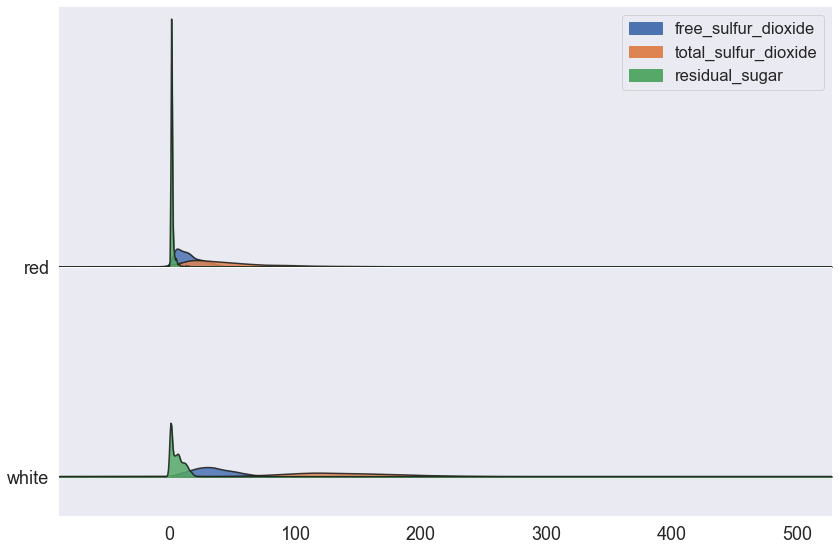

In [9]:
# RIDGELINE PLOTS with respect to the type of wine
ax, fig = joyplot(
    data=df[col_list], 
    by='type',
    column=['pH','chlorides','sulphates','volatile_acidity','citric_acid'],
    #color=['#686de0', '#eb4d4b'],
    ylim = 'own',
    xlim='own',
    legend=True,
    alpha=0.85,
    grid="y",
    figsize=(12, 8)
)
ax, fig = joyplot(
    data=df[col_list], 
    by='type',
    column=['alcohol','density','residual_sugar'],
    #color=['#686de0', '#eb4d4b'],
    ylim = 'own',
    xlim='own',
    legend=True,
    alpha=0.85,
    grid="y",
    figsize=(12, 8)
)
ax, fig = joyplot(
    data=df[col_list], 
    by='type',
    column=['free_sulfur_dioxide','total_sulfur_dioxide','residual_sugar'],
    #color=['#686de0', '#eb4d4b'],
    legend=True,
    grid="y",
    alpha=0.85,
    figsize=(12, 8)
)

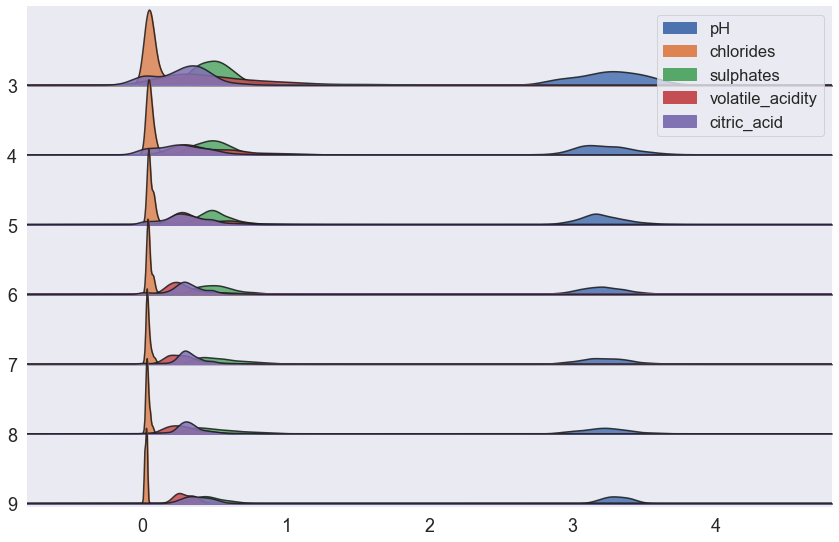

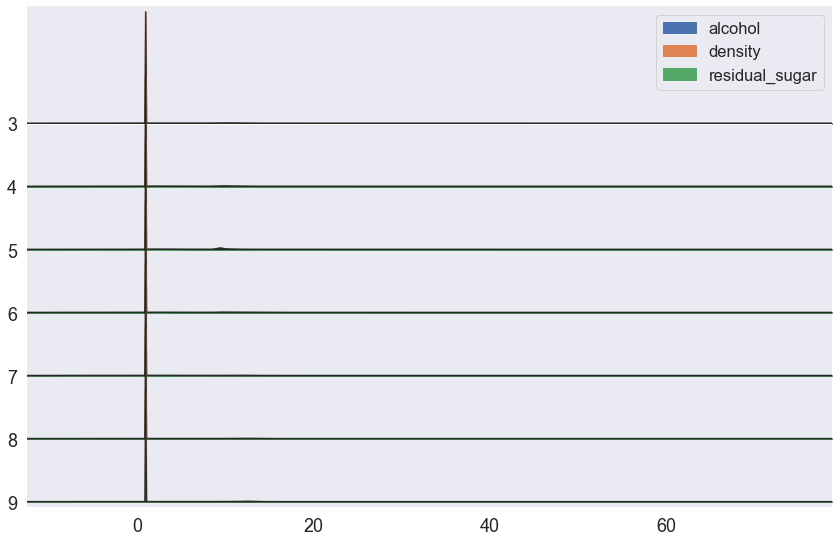

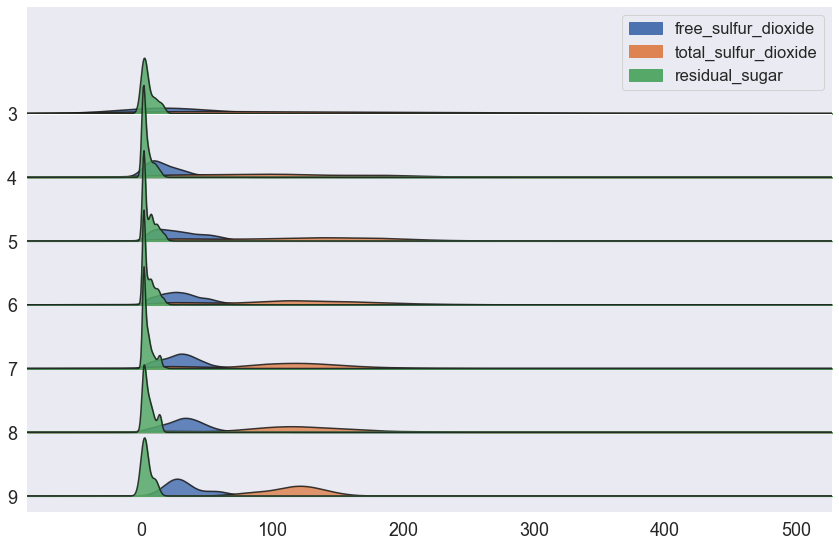

In [10]:
# RIDGELINE PLOTS with respect to the quality
ax, fig = joyplot(
    data=df[col_list], 
    by='quality',
    column=['pH','chlorides','sulphates','volatile_acidity','citric_acid'],
    #color=['#686de0', '#eb4d4b'],
    ylim = 'own',
    xlim='own',
    legend=True,
    alpha=0.85,
    grid="y",
    figsize=(12, 8)
)
ax, fig = joyplot(
    data=df[col_list], 
    by='quality',
    column=['alcohol','density','residual_sugar'],
    #color=['#686de0', '#eb4d4b'],
    ylim = 'own',
    xlim='own',
    legend=True,
    alpha=0.85,
    grid="y",
    figsize=(12, 8)
)
ax, fig = joyplot(
    data=df[col_list], 
    by='quality',
    column=['free_sulfur_dioxide','total_sulfur_dioxide','residual_sugar'],
    #color=['#686de0', '#eb4d4b'],
    legend=True,
    grid="y",
    alpha=0.85,
    figsize=(12, 8)
)

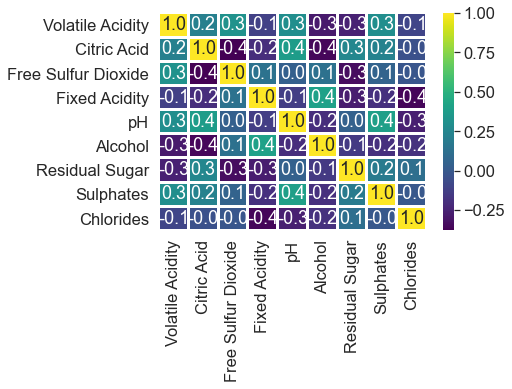

In [11]:
# I am using 0.7 as threshold to remove correlation, and as a consequence I am dropping the density which are:
# density - it is correlated with Sugar and Alcohol
# total sulfur dioxide - it is correlated with Sugars and free sulfur
df_wine = df.drop(columns=['total_sulfur_dioxide','density'])
labels = set(labels)-set(['Density','Total Sulfur Dioxide'])
ax = sn.heatmap(df_wine.drop(columns='quality').corr(), annot=True, fmt=".1f",cmap='viridis',linewidths=2.,xticklabels=labels,yticklabels=labels)

In [12]:
# setting up the linear regression:
X = StandardScaler().fit_transform(df_wine.drop(columns=['quality','type']))
y = df_wine['quality']
#divide the data into training and testing set 
X_train, X_test,y_train,y_test=train_test_split(X,y, random_state=42)
#Creating the linear regression model and fitting the data to it
regression=LinearRegression()
regression.fit(X_train,y_train)
y_predict = regression.predict(X_test)

In [13]:
# The coefficients
print('Coefficients:')
for x,cf in enumerate(regression.coef_):
    print(f"{df_wine.drop(columns=['quality','type']).columns[x]} = {cf}")
# The intercept
print('Intercept: %.2f' 
     % regression.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))
if r2_score(y_test,y_predict) < 0.7 and mean_squared_error(y_test, y_predict) < 0.7:
    print('the dataset is NOT well represented by a linear model')

Coefficients:
fixed_acidity = 0.04254810976426112
volatile_acidity = -0.2241267435041801
citric_acid = -0.034633851182383435
residual_sugar = 0.09337458370014778
chlorides = -0.014525479820818282
free_sulfur_dioxide = 0.026228737719525483
pH = 0.028527106866142918
sulphates = 0.09732634930452908
alcohol = 0.4124971506062465
Intercept: 5.82
Mean squared error: 0.53
Coefficient of determination: 0.30
the dataset is NOT well represented by a linear model


In [14]:
#test a prediction 
data = {'alcohol':3,
 'chlorides':2.,
 'citric_acid': 6,
 'fixed_acidity': 0.2,
 'free_sulfur_dioxide': 0.5,
 'pH':7,
 'residual_sugar': 1,
 'sulphates':0.2,
 'volatile_acidity':3}

quality_predicted = regression.intercept_
for x,cf in enumerate(regression.coef_):
    quality_predicted += cf*data[df_wine.drop(columns=['quality','type']).columns[x]]

if quality_predicted < 5 :
    print('Poor Quality Wine')
elif quality_predicted > 7:
    print('Good Quality Wine')
else:
    print('Average Quality Wine')

Average Quality Wine
